## Exercises & Extra-curriculum

### 1. What are 3 areas in industry where computer vision is currently being used?

- car
- camera
- medical field with pics

### 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is when the model adapts to the training data too well to the point that it doesn't perform well on any unseen data

### 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.

- **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Data can be too simple or less for the data, so adding more data can prevent overfitting as more representations need to be learned
2. Since the model can be too complex compared to the given data, making the model simpler can be an option
3. Apply regularization, as it adds a penalty to the model and forces the model to not find the global minimum quickly and easily by adding weights to the wrong answers
4. Early stopping let's the model to stop training soon as the validation performance doesn't get any better after certain amount
5. Cross-validation can be another choice as it subdivides training data into trian and validation sets to train the model and confirm it's performance then tune the model if needed
6. Data augmentation alters input data so it's not same as previous one, which helps prevent overfitting
7. Adding noise to the data is similar to step 6 in terms of concepts
8. Ensembling is a technique to prevent overfitting by combining models and their predictions to identify most popular results

### 4. Spend 20-minutes reading and clicking through the CNN Explainer website.

- Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.

### 5. Load the torchvision.datasets.MNIST() train and test datasets.

In [ ]:
try:
    !pip install -U mlxtend
    import torchmetrics, mlxtend
    print(mlxtend.__version__)
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(mlxtend.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0.22.0


In [ ]:
import torch, torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torchmetrics import Accuracy
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
device = "cpu"
device

'cpu'

In [ ]:
train_data = datasets.MNIST(root="data",
                            train=True,
                            download=True,
                            transform=ToTensor()
                            )

test_data = datasets.MNIST(root="data",
                           train=False,
                           download=True,
                           transform=ToTensor()
                           )

### 6. Visualize at least 5 different samples of the MNIST training dataset.

In [ ]:
import matplotlib.pyplot as plt
import random

train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
class_names = train_data.classes
class_names, len(class_names)

(['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 10)

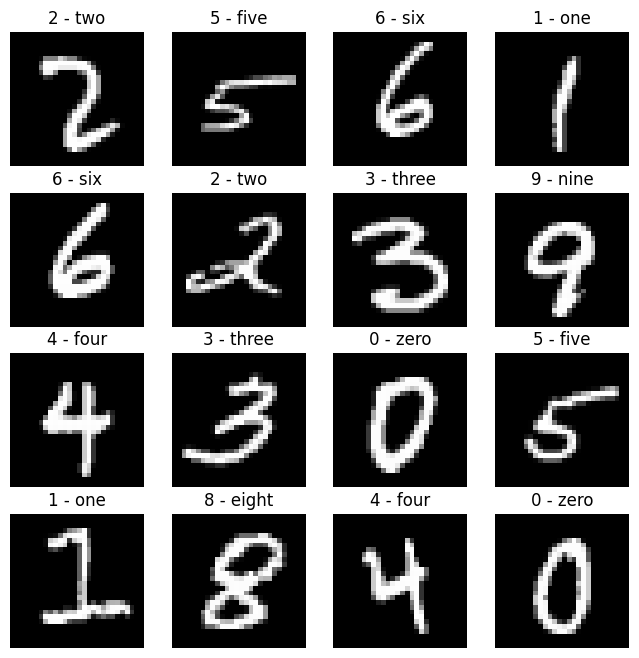

In [ ]:
nrows = 4
ncols = 4

plt.figure(figsize=(8, 8))

for i in range(1, nrows*ncols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    plt.subplot(nrows, ncols, i)
    plt.title(class_names[label])
    plt.imshow(image.squeeze(), cmap="gray")
    plt.axis(False)

### 7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [ ]:
from torch.utils.data import DataLoader
from torch import nn

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

### 8. Recreate model_3 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
class MNISTV3(nn.Module):
    def __init__(self,
                 input_shape: int,
                 output_shape: int,
                 hidden_units: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels=input_shape,
                                                        out_channels=hidden_units,
                                                        kernel_size=2,
                                                        padding=0),
                                              nn.ReLU(),
                                              nn.Conv2d(in_channels=hidden_units,
                                                        out_channels=hidden_units,
                                                        kernel_size=2,
                                                        padding=0),
                                              nn.ReLU(),
                                              nn.MaxPool2d(kernel_size=2)
                                              )
        self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units,
                                                    out_channels=hidden_units,
                                                    kernel_size=2,
                                                    padding=0),
                                          nn.ReLU(),
                                          nn.Conv2d(in_channels=hidden_units,
                                                    out_channels=hidden_units,
                                                    kernel_size=2,
                                                    padding=0),
                                          nn.ReLU(),
                                          nn.MaxPool2d(kernel_size=2)
                                          )
        self.linear_layer = nn.Sequential(nn.Flatten(),
                                          nn.Linear(in_features=hidden_units*5*5,
                                                    out_features=output_shape))
    
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.linear_layer(x)
        return x

In [ ]:
torch.manual_seed(42)

model_3 = MNISTV3(input_shape=1,
                  output_shape=len(class_names),
                  hidden_units=10)

model_3.to(device)

MNISTV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=250, out_features=10, bias=True)
  )
)

### 9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.

In [ ]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
def train(model: nn.Module,
          data_loader: torch.utils.data.DataLoader,
          loss_fn: nn.Module,
          optimizer: torch.optim.Optimizer,
          accuracy_fn,
          device: torch.device):
    
    train_loss, train_acc = 0, 0

    model.train()

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}")

In [ ]:
def test(model: nn.Module,
         data_loader: torch.utils.data.DataLoader,
         loss_fn: nn.Module,
         accuracy_fn,
         device: torch.device):
    
    test_loss, test_acc = 0, 0

    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            test_pred = model(X)
            
            loss = loss_fn(test_pred, y)
            test_loss += loss
            test_acc += accuracy_fn(test_pred, y)

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_3.parameters(),
                             lr=0.01)
accuracy_fn = Accuracy(task='multiclass',
                       num_classes=len(class_names))

In [ ]:
# Model on CPU
epochs = 3

train_time_start_on_cpu = timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----------")
    train(model=model_3,
          data_loader=train_dataloader,
          loss_fn=loss_fn,
          optimizer=optimizer,
          accuracy_fn=accuracy_fn,
          device=device)
    test(model=model_3,
         data_loader=test_dataloader,
         loss_fn=loss_fn,
         accuracy_fn=accuracy_fn,
         device=device)
    
train_time_end_on_cpu = timer()

total_train_time_model_3 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 0.2602 | Train acc: 0.92
Test Loss: 0.1295 | Test Acc: 0.96
Epoch: 1
----------
Train loss: 0.1385 | Train acc: 0.96
Test Loss: 0.1188 | Test Acc: 0.96
Epoch: 2
----------
Train loss: 0.1281 | Train acc: 0.96
Test Loss: 0.1138 | Test Acc: 0.96
Train time on cpu: 101.595 seconds


In [ ]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = None):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make our data device agnostic
            X, y = X.to(device), y.to(device)

            # Make predictions
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_pred, y)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc.item()}

In [ ]:
model_3_results = eval_model(model=model_3,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_3_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTV3',
 'model_loss': 0.11383416503667831,
 'model_acc': 0.9633586406707764}

In [ ]:
# Model on GPU
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.manual_seed(42)

model_4 = MNISTV3(input_shape=1,
                  output_shape=len(class_names),
                  hidden_units=10)

model_4.to(device)

MNISTV3(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=250, out_features=10, bias=True)
  )
)

In [ ]:
from timeit import default_timer as timer

epochs = 3

train_time_start_on_gpu = timer()

for epoch in range(epochs):
    print(f"Epoch: {epoch}\n-----------")
    train(model=model_4,
          data_loader=train_dataloader,
          loss_fn=loss_fn,
          optimizer=optimizer,
          accuracy_fn=accuracy_fn.to(device),
          device=device)
    test(model=model_4,
         data_loader=test_dataloader,
         loss_fn=loss_fn,
         accuracy_fn=accuracy_fn.to(device),
         device=device)

train_time_end_on_gpu = timer()

total_train_time_model_4 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

Epoch: 0
-----------
Train loss: 2.3046 | Train acc: 0.10
Test Loss: 2.3048 | Test Acc: 0.11
Epoch: 1
-----------
Train loss: 2.3046 | Train acc: 0.10
Test Loss: 2.3048 | Test Acc: 0.11
Epoch: 2
-----------
Train loss: 2.3046 | Train acc: 0.10
Test Loss: 2.3048 | Test Acc: 0.11
Train time on cuda: 47.837 seconds


In [ ]:
model_4_results = eval_model(model=model_4,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_3_results["runtime"] = total_train_time_model_3
model_4_results["runtime"] = total_train_time_model_4

In [ ]:
print(f"Model 3: \n{model_3_results}"), print(f"Model 4: \n{model_4_results}")

Model 3: 
{'model_name': 'MNISTV3', 'model_loss': 0.11383416503667831, 'model_acc': 0.9633586406707764, 'runtime': 101.59496130100024}
Model 4: 
{'model_name': 'MNISTV3', 'model_loss': 2.3048439025878906, 'model_acc': 0.10563098639249802, 'runtime': 47.83736541600001}


(None, None)

### 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [ ]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [ ]:
pred_probs = make_predictions(model=model_3,
                              data=test_samples,
                              device=device)

In [ ]:
pred_classes = pred_probs.argmax(dim=1)

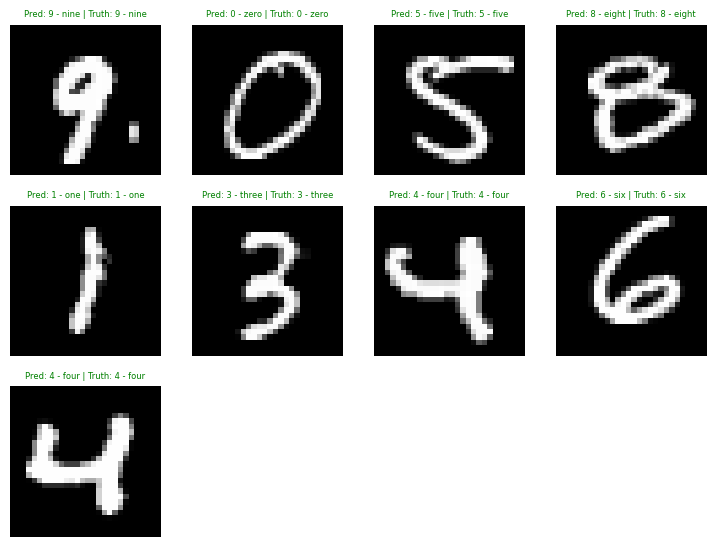

In [ ]:
plt.figure(figsize=(9, 9))
nrows = 4
ncols = 4

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=6, c="g")
    else:
        plt.title(title_text, fontsize=6, c="r")

    plt.axis(False);

### 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
y_preds = []

model_3.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)

        y_logit = model_3(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

tensor([7, 2, 1,  ..., 4, 8, 6])

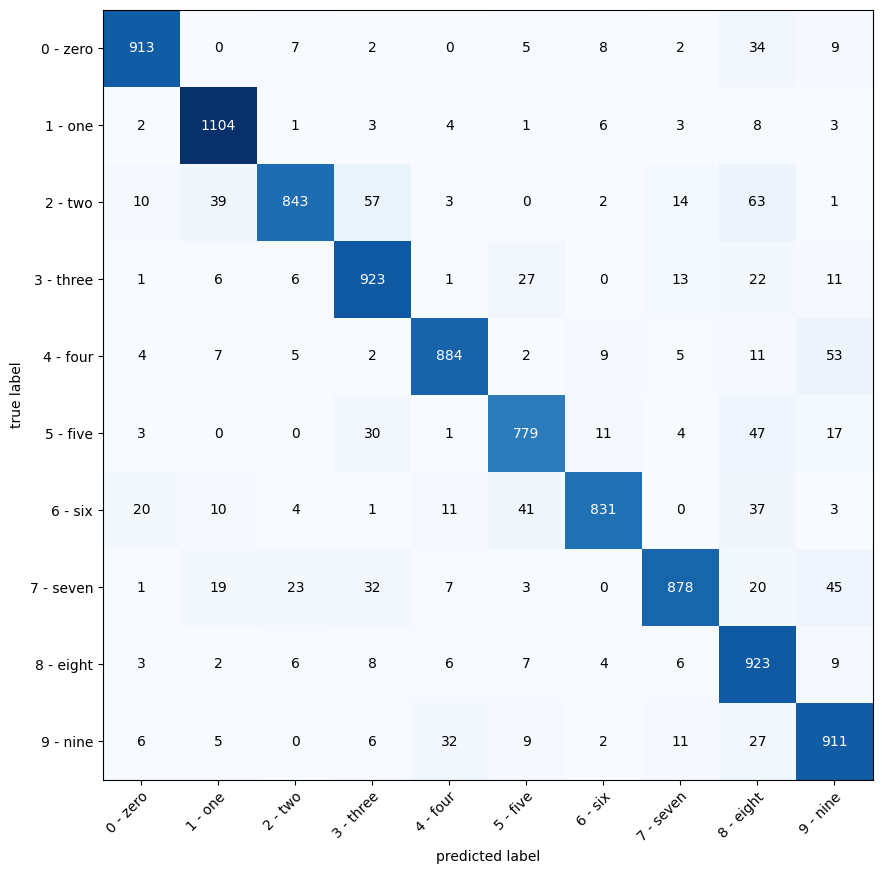

In [ ]:
from torchmetrics import ConfusionMatrix

confmat = ConfusionMatrix(task='multiclass',
                          num_classes=len(class_names))

confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10, 10))

### 12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [ ]:
random_tensor = torch.rand([1, 3, 64, 64])

random_conv2d = nn.Conv2d(in_channels=3, out_channels=20,
                          kernel_size=3, padding=0)

random_conv2d(random_tensor).shape

torch.Size([1, 20, 62, 62])

### 13. Use a model similar to the trained model_3 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.

- Then plot some predictions where the model was wrong alongside what the label of the image should've been.
- After visualing these predictions do you think it's more of a modelling error or a data error?
- As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?